In [8]:
import ROOT,glob,os,math

In [9]:
path="./../../output/root/Test/"
paths=glob.glob(path+"*root")
print paths
f=ROOT.TFile(paths[1],"r")
for i in f.GetListOfKeys():
    print i.GetName()

['./../../output/root/Test/Zee_MC_CR_global_LeadFatJ_Xmass.root', './../../output/root/Test/Zee_MC_SR_global_LeadFatJ_Xmass.root', './../../output/root/Test/Zmm_MC_CR_global_LeadFatJ_Xmass.root', './../../output/root/Test/Zmm_MC_SR_global_LeadFatJ_Xmass.root', './../../output/root/Test/Zmm_data_CR_global_LeadFatJ_Xmass.root', './../../output/root/Test/Zee_data_CR_global_LeadFatJ_Xmass.root']
data
BHistGlobal
BkgFunc1
BkgFunc2


In [10]:
tf=f.Get("BkgFunc2")
func=tf.GetFormula()
p0=tf.GetParameter(0)
p0E=tf.GetParError(0) 
print func,p0,p0E
a=tf.Eval(4300)
print a

Name: FitFunction2 Title:  [0] * pow((1-x/13000.0), [1]) * pow( x/13000.0, ( [2]+ log(pow(x/13000.0, [3])) ) ) 0.422265881657 0.017132471299
1.22434409976


In [18]:
#tf1=ROOT.TF1("bkg","[0] * pow((1-x), [1]) * pow( x, ( [2]+ log(pow(x, [3])) ) )",-3,3)
tf1=ROOT.TF1("bkg","[0] * pow((1-x/13000.0), [1]) ",0,5000)
tf1.SetParameter(0,tf.GetParameter(0))
tf1.SetParameter(1,tf.GetParameter(1))
print tf1,tf1.Eval(1400)
func=tf1.GetFormula()
p0=tf1.GetParameter(0)
p0E=tf1.GetParError(0) 
print func,p0,p0E
a=tf.Eval(3000)
print a

Name: bkg Title: [0] * pow((1-x/13000.0), [1])  0.208425605913
Name: bkg Title: [0] * pow((1-x/13000.0), [1])  0.422265881657 0.0
nan


Error in <TFormula::DoEval>: Formula has error and  it is not properly initialized 


In [7]:
tf2=ROOT.TF1("bkg","[0] * pow((1-x/13000.0), [1]) * pow( x/13000.0, ( [2]+ log(pow(x/13000.0, [3])) ) )",0,5000)
tf2.SetParameter(0,tf.GetParameter(0))
tf2.SetParameter(1,tf.GetParameter(1))
tf2.SetParameter(2,tf.GetParameter(2))
tf2.SetParameter(3,tf.GetParameter(3))
print tf2.Eval(1400)

80.9624358058


In [17]:
data=f.Get("data")
hist=data.Clone()
for i in range(hist.GetNbinsX()):
    hist.SetBinContent(i, (tf.Integral(hist.GetBinLowEdge(i), hist.GetBinLowEdge(i+1))) )

Name: FitFunction2 Title:  [0] * pow((1-x/13000.0), [1]) * pow( x/13000.0, ( [2]+ log(pow(x/13000.0, [3])) ) )


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


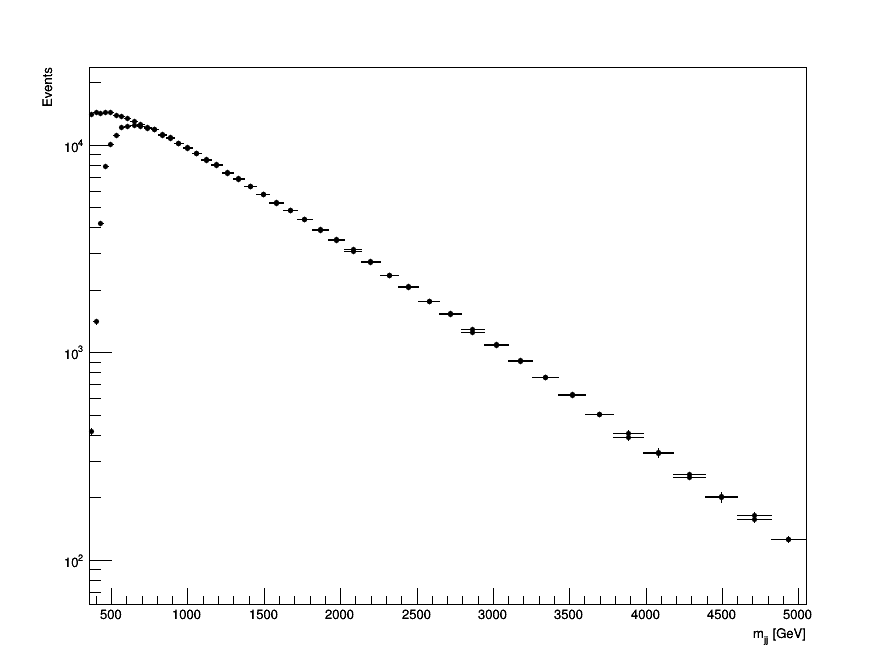

In [18]:
tf=f.Get("BkgFunc2")
print tf
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetLogy()
ROOT.gStyle.SetOptStat(0)
c1.cd()
data.Draw()
hist.Draw("SAME")
c1.Draw()